In [21]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('milestone_3/final_annotated_corpus.tsv', sep='\t')

In [19]:
type_df = df.groupby('type').count()

,Title,Text,central_entity
type,,,
FILM,422,422,422
FILM-CREW,16,16,16
OTHERS,32,32,32
PERFORMER,30,30,30


The distribution of the entity types is shown below. There is significant class inbalances: 84.4% of texts fall under the film type.

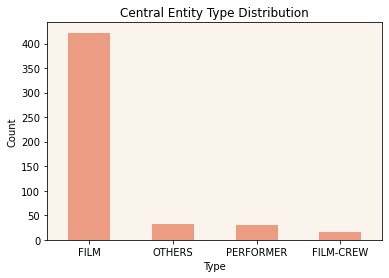

In [61]:
ax = plt.axes()
ax.set_facecolor('#FAF4ED')
type_df.sort_values('Text', ascending=False)['Text'].plot.bar(color='#EB9C83')
plt.xticks(rotation=0)
plt.title('Central Entity Type Distribution')
plt.xlabel("Type")
plt.ylabel("Count")
plt.savefig('distribution.png')

Most common words in central entities

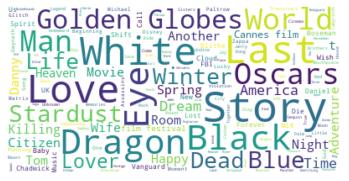

In [44]:
entities = ' '.join(df['central_entity'])
stopwords = set(STOPWORDS)
stopwords.update(['None', 's'])
entity_cloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(entities)
plt.imshow(entity_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
entity_cloud.to_file('entity_cloud.png')

Most common words in texts.

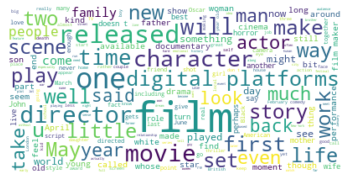

In [47]:
entities = ' '.join(df['Text'])
text_cloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(entities)
plt.imshow(text_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
text_cloud.to_file('text_cloud.png')

For the **central entity** annotation, we have decided to use the percentage agreement, which calculates observed agreement across all coders and items, as the label class in the central entity annotation does not have a particular distribution. The interannotator agreement score is 0.94.

For the central entity **type** annotation, we have decided to use the Scott's π since the label 'FILM' occurs the most compared to other labels, which was observed by all annotators. The interannotator agreement score is 0.87.